In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage.io import imsave, imread

from PIL import Image, ImageOps

In [2]:
def plot_img_and_hist(image, axes, bins=256):
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


def draw_graphics(image, image_corrected, image_title, correction_title):
    plt.figure(figsize=(13, 9))
    axes = np.zeros((2, 2), dtype=object)
    axes[0, 0] = plt.subplot(2, 2, 1)
    axes[0, 1] = plt.subplot(2, 2, 2, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[1, 0] = plt.subplot(2, 2, 3)
    axes[1, 1] = plt.subplot(2, 2, 4)

    plot_img_and_hist(image, axes[:, 0])[0].set_title(image_title)
    plot_img_and_hist(image_corrected, axes[:, 1])[0].set_title(correction_title)

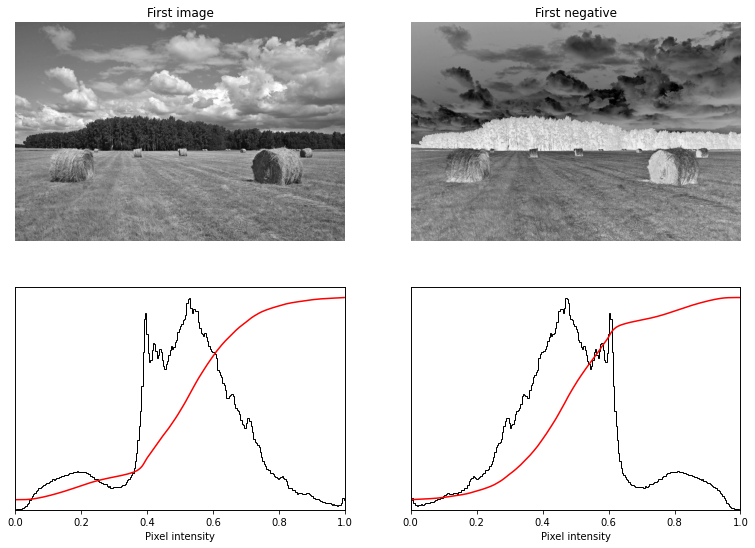

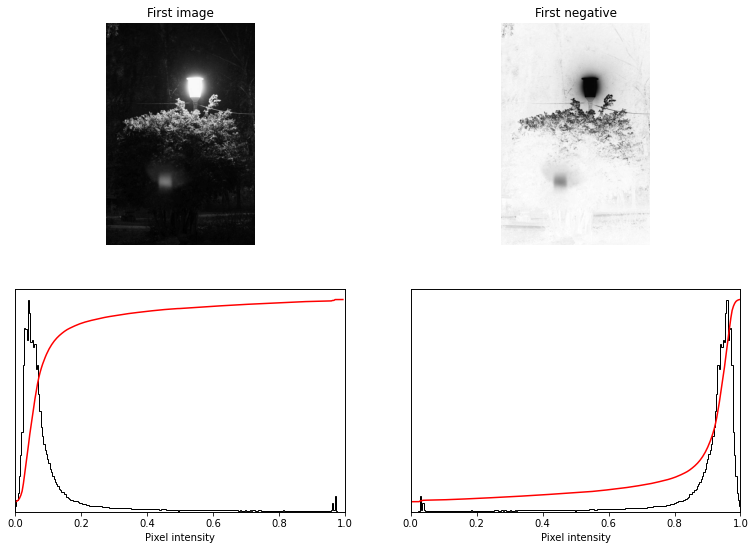

In [3]:
img_01 = Image.open('01.jpg')
img_02 = Image.open('02.jpg')

img_01_bw = img_01.convert('L')
img_02_bw = img_02.convert('L')

img_01_bw.save('01_bw.jpg')
img_02_bw.save('02_bw.jpg')

img_01_neg = ImageOps.invert(img_01_bw)
img_02_neg = ImageOps.invert(img_02_bw)

img_01_neg.save('01_neg.jpg')
img_02_neg.save('02.neg.jpg')

draw_graphics(img_01_bw, img_01_neg, 'First image', 'First negative')
draw_graphics(img_02_bw, img_02_neg, 'First image', 'Second negative')

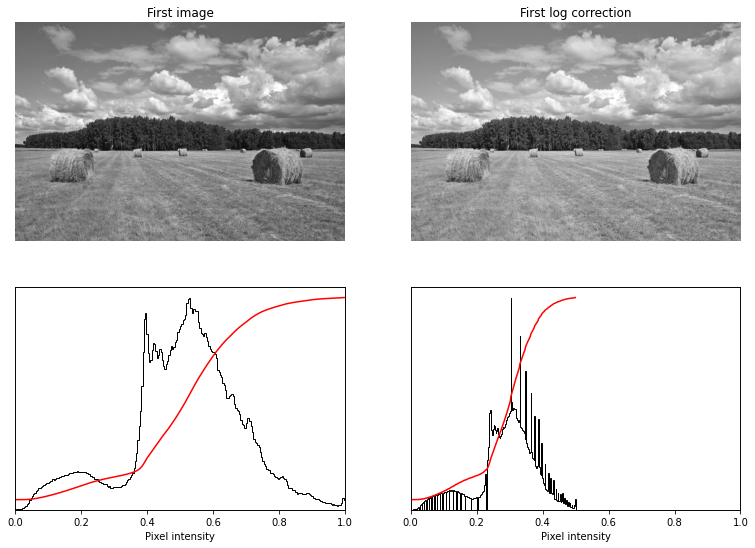

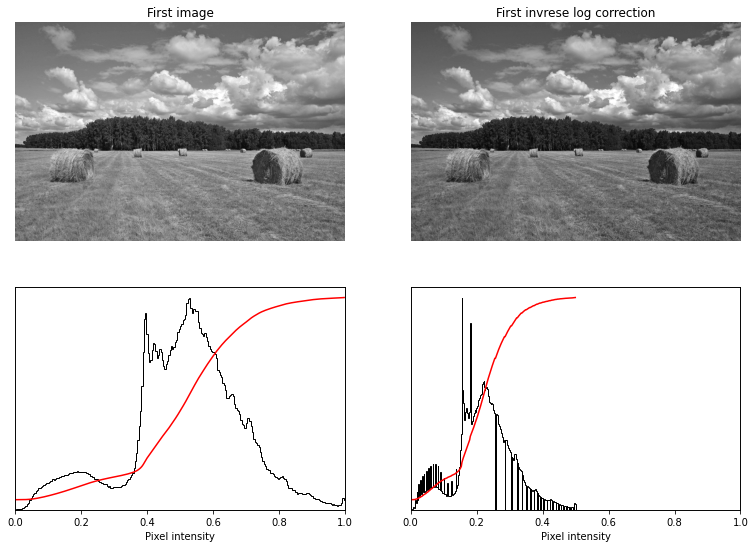

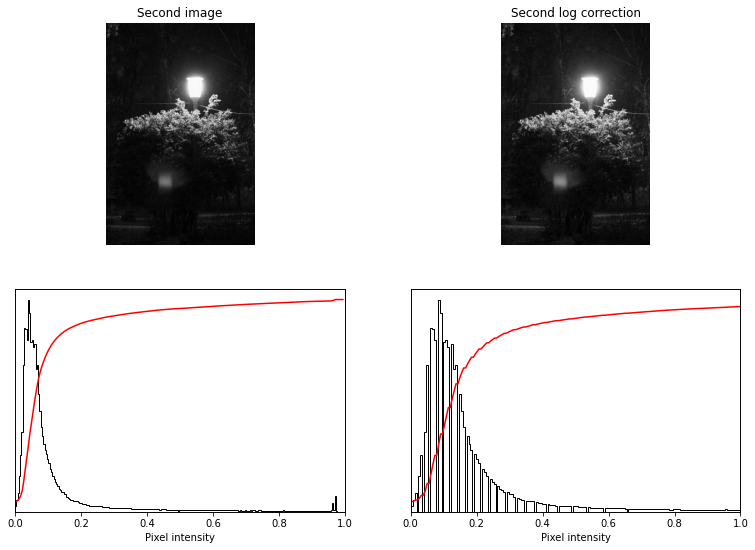

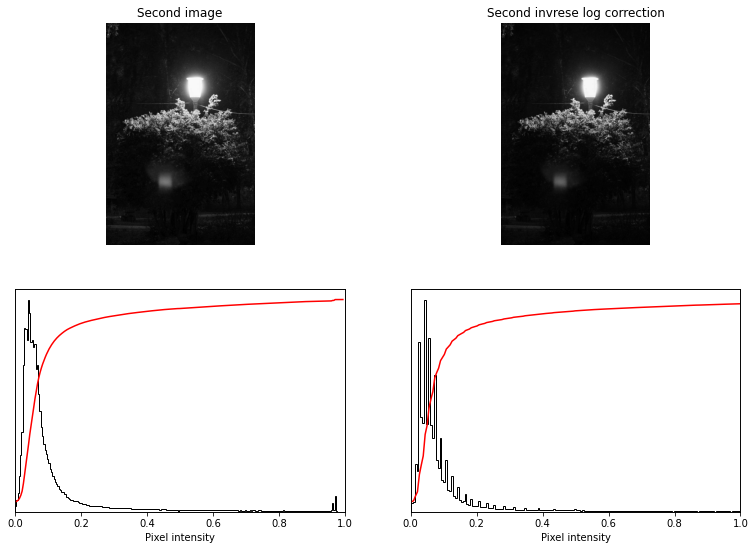

In [10]:
float_01 = img_as_float(img_01_bw)
float_02 = img_as_float(img_02_bw)

img_01_log_x = exposure.adjust_log(float_01, 0.5)
img_02_log_x = exposure.adjust_log(float_02, 1.5)

img_01_log_y = exposure.adjust_log(float_01, 0.5, inv=True)
img_02_log_y = exposure.adjust_log(float_02, 1.5, inv=True)

imsave('01_log_x.jpg', (img_01_log_x * 255).astype(np.uint8))
imsave('02_log_x.jpg', (img_02_log_x * 255).astype(np.uint8))
imsave('01_log_y.jpg', (img_01_log_y * 255).astype(np.uint8))
imsave('02_log_y.jpg', (img_02_log_y * 255).astype(np.uint8))

draw_graphics(img_01_bw, img_01_log_x, 'First image', 'First log correction')
draw_graphics(img_01_bw, img_01_log_y, 'First image', 'First invrese log correction')

draw_graphics(img_02_bw, img_02_log_x, 'Second image', 'Second log correction')
draw_graphics(img_02_bw, img_02_log_y, 'Second image', 'Second invrese log correction')


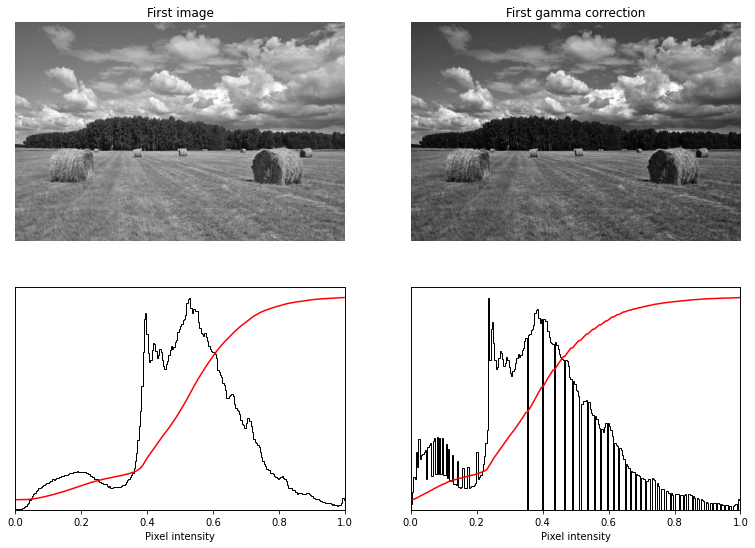

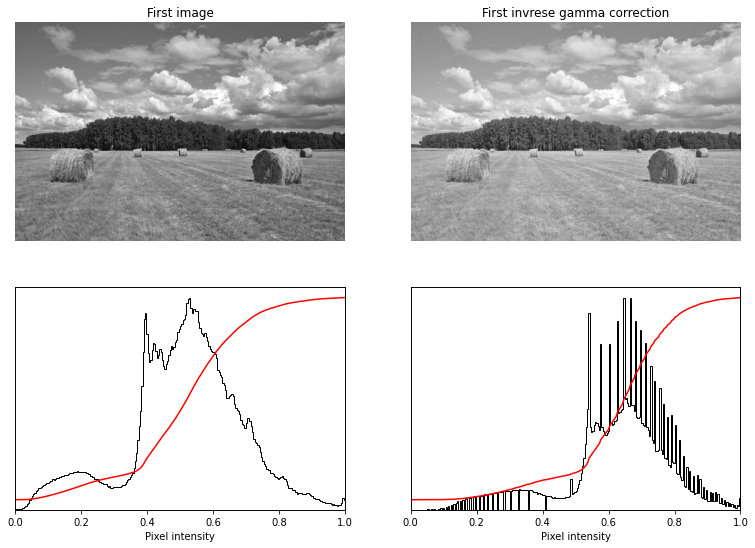

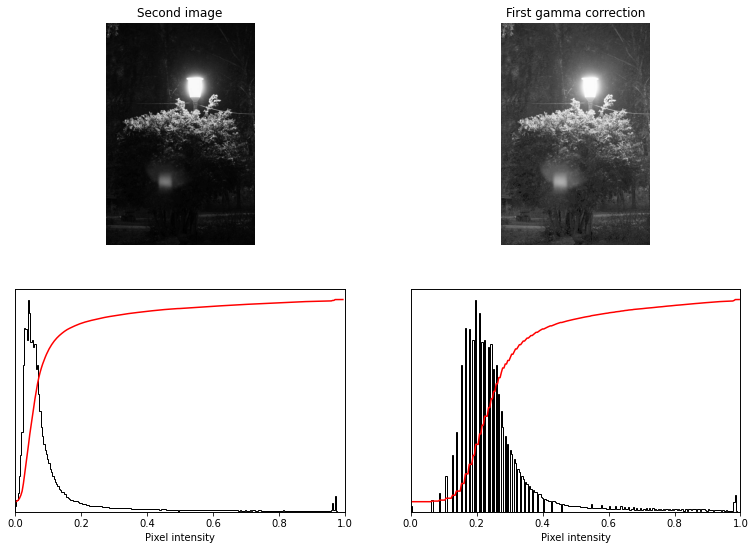

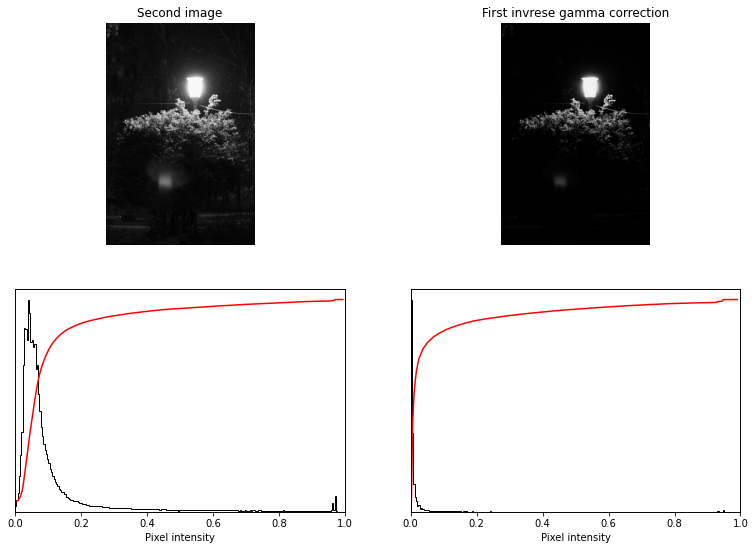

In [11]:
float_01 = img_as_float(img_01_bw)
float_02 = img_as_float(img_02_bw)

img_01_deg_x = exposure.adjust_gamma(float_01, 1.5)
img_02_deg_x = exposure.adjust_gamma(float_02, 0.5)

img_01_deg_y = exposure.adjust_gamma(float_01, 1 / 1.5, )
img_02_deg_y = exposure.adjust_gamma(float_02, 1 / 0.5, )

imsave('01_deg_x.jpg', (img_01_deg_x * 255).astype(np.uint8))
imsave('02_deg_x.jpg', (img_02_deg_x * 255).astype(np.uint8))
imsave('01_deg_y.jpg', (img_01_deg_y * 255).astype(np.uint8))
imsave('02_deg_y.jpg', (img_02_deg_y * 255).astype(np.uint8))

draw_graphics(img_01_bw, img_01_deg_x, 'First image', 'First gamma correction')
draw_graphics(img_01_bw, img_01_deg_y, 'First image', 'First invrese gamma correction')

draw_graphics(img_02_bw, img_02_deg_x, 'Second image', 'First gamma correction')
draw_graphics(img_02_bw, img_02_deg_y, 'Second image', 'First invrese gamma correction')

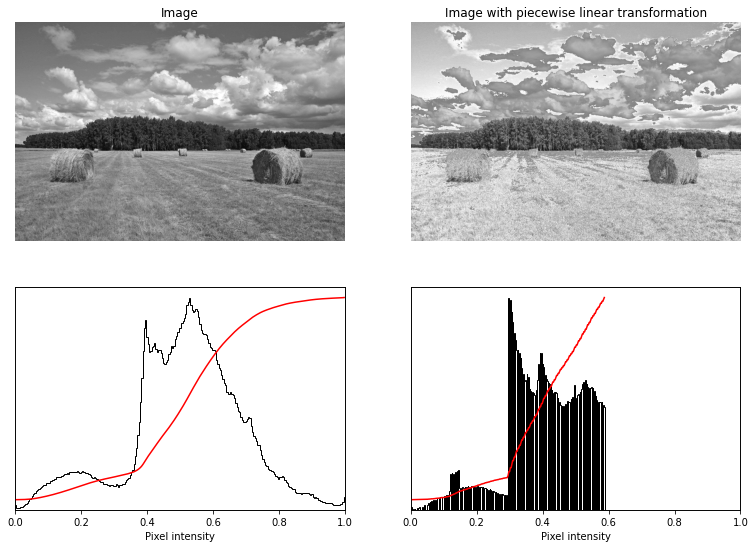

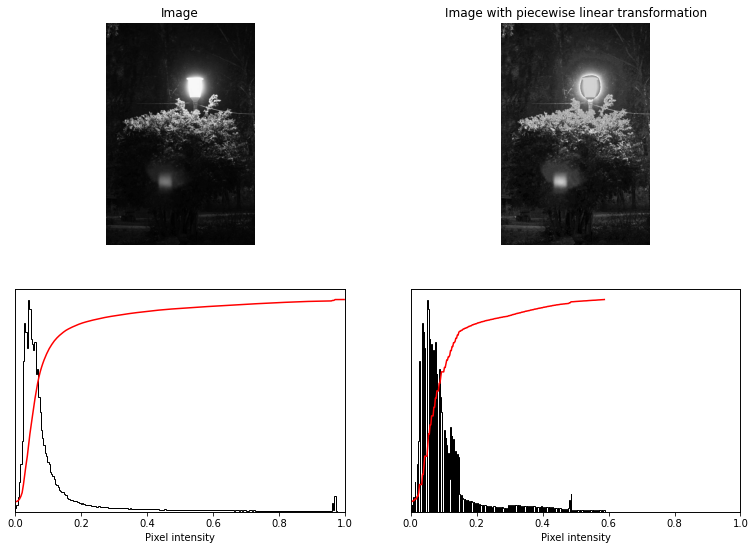

In [12]:
import cv2


def piecewise_linear_transformation(image):
    img_gray = cv2.imread(image, flags=0)  # flags=0  Read as grayscale image

    height, width = img_gray.shape[:2]

    img_stretch = np.empty((height, width), np.uint8)
    #  Create a blank array
    k1 = 1.3  # imgGray[h,w] < r1:
    k2 = 1  # r1 <= imgGray[h,w] <= r2
    k3 = 0.5  # imgGray[h,w] > r2
    for h in range(height):
        for w in range(width):
            #print(f'{h} {w}')
            if img_gray[h, w] < 30:
                img_stretch[h, w] = k1 * img_gray[h, w]
            elif 30 <= img_gray[h, w] <= 150:
                img_stretch[h, w] = k2 * (img_gray[h, w])
            elif img_gray[h, w] > 150:
                img_stretch[h, w] = k3 * (img_gray[h, w])

    draw_graphics(img_gray, img_stretch, 'Image', 'Image with piecewise linear transformation')
    return img_stretch

img_01_sl = piecewise_linear_transformation('01_bw.jpg')
img_02_sl = piecewise_linear_transformation('02_bw.jpg')

imsave('01_sl.jpg', img_01_sl)
imsave('02_sl.jpg', img_02_sl)